<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.870655,47.464584,70.831962,0.004940,170.172141,170.163311,0.008830
1,0.0,1.0,93.887116,68.110194,59.500066,-0.030868,231.466508,231.505718,-0.039210
2,0.0,2.0,39.968307,70.347859,37.658251,-0.011485,157.962932,157.971860,-0.008928
3,0.0,3.0,43.295552,93.138613,43.824704,-0.022550,190.236319,190.260238,-0.023919
4,0.0,4.0,79.649399,21.699784,49.663256,-0.057190,160.955248,161.011471,-0.056223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.032024,67.812831,59.198901,0.008049,200.051805,200.043647,0.008158
119996,999.0,116.0,65.574803,37.737817,82.520111,-0.017869,195.814862,195.822328,-0.007466
119997,999.0,117.0,89.150008,68.887959,64.149811,0.010152,232.197930,232.186612,0.011318
119998,999.0,118.0,27.733784,76.989367,50.147853,0.013915,164.884919,164.874911,0.010008


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.870655,47.464584,70.831962,0.004940,170.172141,170.163311,0.008830
1,0.0,1.0,93.887116,68.110194,59.500066,-0.030868,231.466508,231.505718,-0.039210
2,0.0,2.0,39.968307,70.347859,37.658251,-0.011485,157.962932,157.971860,-0.008928
3,0.0,3.0,43.295552,93.138613,43.824704,-0.022550,190.236319,190.260238,-0.023919
4,0.0,4.0,79.649399,21.699784,49.663256,-0.057190,160.955248,161.011471,-0.056223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.032024,67.812831,59.198901,0.008049,200.051805,200.043647,0.008158
119996,999.0,116.0,65.574803,37.737817,82.520111,-0.017869,195.814862,195.822328,-0.007466
119997,999.0,117.0,89.150008,68.887959,64.149811,0.010152,232.197930,232.186612,0.011318
119998,999.0,118.0,27.733784,76.989367,50.147853,0.013915,164.884919,164.874911,0.010008


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.870655  47.464584  70.831962  ...  170.172141  170.163311  0.008830
      1.0    93.887116  68.110194  59.500066  ...  231.466508  231.505718 -0.039210
      2.0    39.968307  70.347859  37.658251  ...  157.962932  157.971860 -0.008928
      3.0    43.295552  93.138613  43.824704  ...  190.236319  190.260238 -0.023919
      4.0    79.649399  21.699784  49.663256  ...  160.955248  161.011471 -0.056223
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  63.032024  67.812831  59.198901  ...  200.051805  200.043647  0.008158
      116.0  65.574803  37.737817  82.520111  ...  195.814862  195.822328 -0.007466
      117.0  89.150008  68.887959  64.149811  ...  232.197930  232.186612  0.011318
      118.0  27.733784  76.989367  50.147853  ...  164.884919  164.874911  0.010008
      119.0  37.182239  70.271314  88.510508  ...  205.969563  205.959687  0.009877

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.870655  47.464584  70.831962  ...  170.172141  170.163311  0.008830
      1.0    93.887116  68.110194  59.500066  ...  231.466508  231.505718 -0.039210
      2.0    39.968307  70.347859  37.658251  ...  157.962932  157.971860 -0.008928
      3.0    43.295552  93.138613  43.824704  ...  190.236319  190.260238 -0.023919
      4.0    79.649399  21.699784  49.663256  ...  160.955248  161.011471 -0.056223
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  63.032024  67.812831  59.198901  ...  200.051805  200.043647  0.008158
      116.0  65.574803  37.737817  82.520111  ...  195.814862  195.822328 -0.007466
      117.0  89.150008  68.887959  64.149811  ...  232.197930  232.186612  0.011318
      118.0  27.733784  76.989367  50.147853  ...  164.884919  164.874911  0.010008
      119.0  37.182239  70.271314  88.510508  ...  205.969563  205.959687  0.009877

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.870655,47.464584,70.831962,0.004940,170.172141,170.163311,0.008830
1,0.0,1.0,93.887116,68.110194,59.500066,-0.030868,231.466508,231.505718,-0.039210
2,0.0,2.0,39.968307,70.347859,37.658251,-0.011485,157.962932,157.971860,-0.008928
3,0.0,3.0,43.295552,93.138613,43.824704,-0.022550,190.236319,190.260238,-0.023919
4,0.0,4.0,79.649399,21.699784,49.663256,-0.057190,160.955248,161.011471,-0.056223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.032024,67.812831,59.198901,0.008049,200.051805,200.043647,0.008158
119996,999.0,116.0,65.574803,37.737817,82.520111,-0.017869,195.814862,195.822328,-0.007466
119997,999.0,117.0,89.150008,68.887959,64.149811,0.010152,232.197930,232.186612,0.011318
119998,999.0,118.0,27.733784,76.989367,50.147853,0.013915,164.884919,164.874911,0.010008


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.870655  47.464584  70.831962  ...  170.172141  170.163311  0.008830
      1.0    93.887116  68.110194  59.500066  ...  231.466508  231.505718 -0.039210
      2.0    39.968307  70.347859  37.658251  ...  157.962932  157.971860 -0.008928
      3.0    43.295552  93.138613  43.824704  ...  190.236319  190.260238 -0.023919
      4.0    79.649399  21.699784  49.663256  ...  160.955248  161.011471 -0.056223
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  63.032024  67.812831  59.198901  ...  200.051805  200.043647  0.008158
      116.0  65.574803  37.737817  82.520111  ...  195.814862  195.822328 -0.007466
      117.0  89.150008  68.887959  64.149811  ...  232.197930  232.186612  0.011318
      118.0  27.733784  76.989367  50.147853  ...  164.884919  164.874911  0.010008
      119.0  37.182239  70.271314  88.510508  ...  205.969563  205.959687  0.009877

[120000 rows x 7 columns]

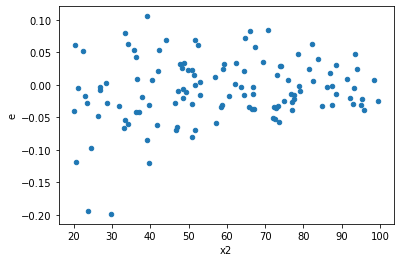

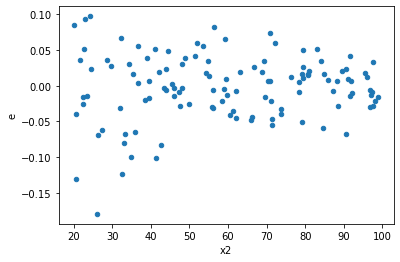

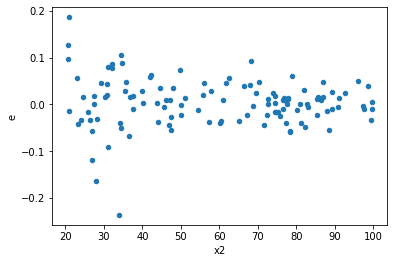

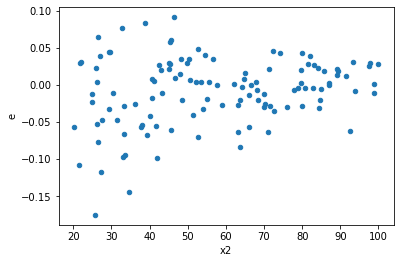

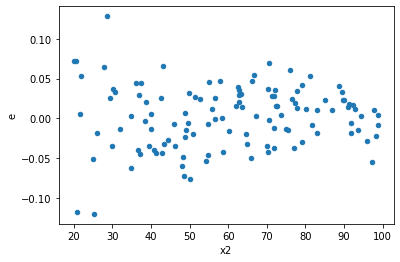

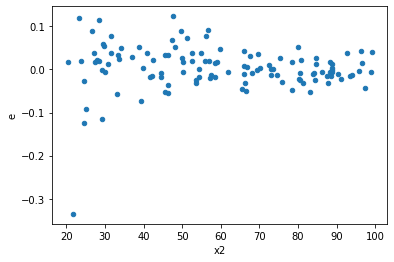

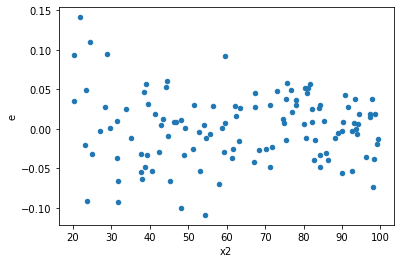

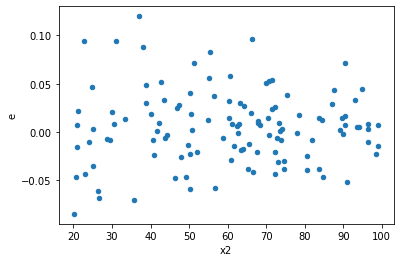

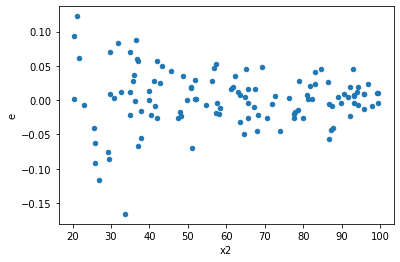

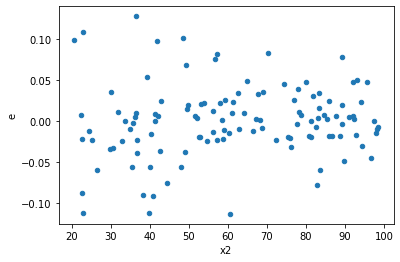

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.02641590797732924,0.1671823998515301,0.0006003615449393009,0.003799599996625684,0.1580065126519804,7.12805206841376e-09,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.02874158443739993,0.2029422005422268,0.0006532178281227257,0.0046123227395960635,0.14162448401863847,1.1177268811746535e-09,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.020777579051675994,0.11783602866942369,0.000472217705719909,0.0026780915606687203,0.17632619909455077,4.298110504515587e-08,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.0391493291824197,0.1031268730355605,0.0008897574814186296,0.0023437925689900117,0.37962296373439075,0.0015189909210606785,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.038488085317520404,0.11962561164956412,0.0008747292117618273,0.002718763901126457,0.32173783512404425,0.00022561070168060026,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.02835347491286863,0.2088852486107403,0.0006443971571106507,0.0047473920138804615,0.13573708579922564,5.36578152308213e-10,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.05091731790949749,0.1907149226726491,0.0011572117706703975,0.004334430060742025,0.2669812996065025,2.047794566864824e-05,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.034971651625618966,0.13838471553041018,0.0007948102642186129,0.003145107171145686,0.25271325298879493,9.63895741569296e-06,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.0466065173600533,0.156083160116002,0.0010592390309103023,0.003547344548090955,0.2986005493828741,8.907360570294607e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    995
Reject005=1 : Homoscedasticity        5
Name: Result_test, dtype: int64